**Ejercicio 21 : BERNAL AGUILAR ITALIA**


*Movimiento browniano*

In [ ]:
from random import gauss
from math import exp
import matplotlib.pyplot as plt

In [ ]:
mu=0.001 
sigma=0.04  #sigma
p0=10
t=30

In [ ]:
def trayectoria(mu,sigma,p0,t):
    l=[p0]
    pt=p0
    for i in range(t):
        pt=pt*exp(mu + sigma*gauss(0,1))
        l.append(pt)
    return l

In [ ]:
l=trayectoria(mu, sigma,p0,t)

In [ ]:
print(l)

[10, 9.888759511155707, 10.426200576072317, 10.052260552812413, 10.042088782929122, 9.895514650031895, 9.598323633437762, 9.334615043643076, 9.523889193054867, 10.423151603926433, 9.977323708167726, 10.86739610260678, 11.234857694231101, 11.625387981502525, 11.174417017038444, 10.472063565585554, 9.616314959927196, 9.571478087223655, 9.520095649243457, 9.672105261751785, 9.381193946055634, 9.87181633239357, 9.653636948885994, 9.61503525598413, 9.973422860841138, 10.303945553780391, 10.661804389705061, 10.941708041202292, 12.157568186581393, 11.801480548845364, 11.437876010996368]


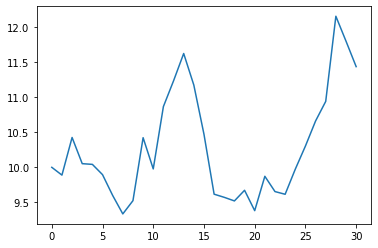

In [ ]:

plt.plot(l)
plt.show()

In [ ]:
mu=0.001
sigma=0.04
p0=10
t=200

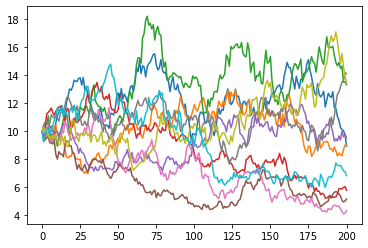

In [ ]:
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

#### Ejercicio 

Estudiar el comportamiento de las trayectorias al variar $\mu$ y $\sigma$.

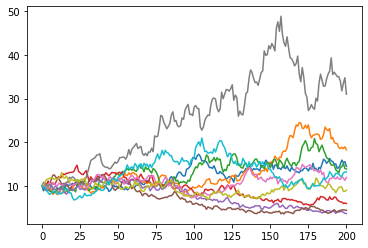

In [ ]:
#Mu menor
mu=0.0002 
sigma=0.05  #sigma
p0=10
t=200
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

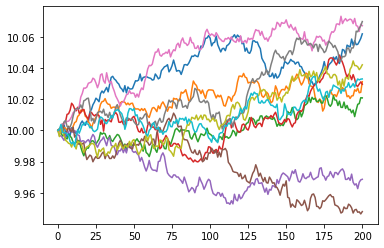

In [ ]:
#Mu y sigma menor
mu=0.000015 
sigma=0.00025  #sigma
p0=10
t=200
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

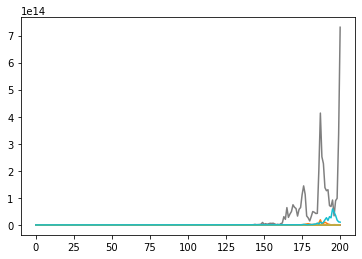

In [ ]:
#Mu y sigma mayor
mu=0.09 
sigma=0.7  #sigma
p0=10
t=200
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

Entonces, sabiendo que $P_t=P_0 e^{\mu t +\sigma \beta_t}=P_t=P_0 e^{\mu t + \sigma \sqrt t z}$, 
¿cuál es el valor esperado de $P_t$?

Tendríamos:

$$E[P_t]=E[P_0 e^{\mu t + \sigma \sqrt t z}] = P_0 E[e^{\mu t + \sigma \sqrt t z}]$$

Y para poder evaluar esto, necesitamos utilizar la función generadora de momentos:
    
$$\mu_x(s)=e^{\mu s + \frac{\sigma^2 s^2}{2}}$$

De manera que:
    
$$E[P_t]=P_0 e^{(\mu + \frac{\sigma}{2})t}$$

Y la varianza:
    
$$V[P_t]=P_0^2e^{2\mu t}(e^{2t\sigma^2}-e^{t\sigma^2})$$

Pero la cuestión práctica es: ¿Dados los precios de una acción, $P_0, P_1,...,P_t$, ¿cómo estimar $\mu$ y $\sigma$?

Recordando que:

$$R_t \sim N(\mu, \sigma)$$

y

$$\hat{\mu} = \frac{\sum_{t=1}^{T}R_t}{T}$$

y

$$\hat{\sigma}=\sqrt{\frac{1}{T-1} \sum_{t=1}^T (R_t - \hat{\mu})^2}$$

En la práctica, dados:
$$P_0, P_1, P_2, P_3, ...$$

Calculamos:
    
$$R_1=\log(\frac{P_1}{P_0})$$

$$R_2=\log(\frac{P_2}{P_1})$$

$$R_3=\log(\frac{P_3}{P_2})$$

$$R_4=\log(\frac{P_4}{P_3})$$

$$...$$

Y calculamos la media y la desviación estándar de estos valores, y podemos observar que:

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} > 0$, la acción tiende a crecer.

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} \approx 0$, la acción tiende a permanecer constante.

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} < 0$, la acción tiende a decrecer.

Y podemos implementar esto con el siguiente código, usando la librería investpy.

In [3]:
! pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.6 MB/s 
     |████████████████████████████████| 235 kB 39.4 MB/s 
     |████████████████████████████████| 6.4 MB 35.2 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=4ed55f83914419a7d3e6d205dc059ee6e2c85d6a62fd980f6fe9127598051ee4
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
! pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from statistics import mean,stdev,pstdev
from math import log
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import investpy

Pero antes, recordemos un poco de Pandas

Cargamos los datos y los guardamos.

In [5]:
#df abreviación de data frame
df=investpy.get_stock_historical_data(stock="DIS",country="Mexico",from_date="01/01/2022", to_date="31/05/2022")

df.to_csv("datos.csv")

Podemos usar las funciones de Pandas para analizar los datos.

In [6]:
type(df) # Checamos el tipo de dato

pandas.core.frame.DataFrame

In [7]:
df.shape # Este es un atributo, no una función. Devuelve (número de renglones, número de columnas)

(103, 6)

In [ ]:
print(df.head()) # La función head() muestra los primeros 5 renglones del data frame

              Open     High      Low    Close  Volume Currency
Date                                                          
2022-01-03  3200.0  3244.09  3199.99  3213.13    1873      MXN
2022-01-04  3250.0  3299.91  3190.01  3203.39    8362      MXN
2022-01-05  3200.0  3255.86  3187.75  3205.20    5092      MXN
2022-01-06  3205.2  3242.00  3140.01  3222.93    3863      MXN
2022-01-07  3215.5  3249.98  3206.01  3221.94    7552      MXN


Generalmente, comenzamos a analizar un data frame conociendo su tamaño y la información que contiene.

In [ ]:
df.columns # Da el nombre de las columnas

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

Cada columna debe ser del mismo tipo, pero un renglón puede tener objetos de diferentes tipos.

In [ ]:
df.dtypes # Da el tipo de objeto que guardan las columnas

Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

In [ ]:
df.info() # Esta función da información más amplia

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2022-01-03 to 2022-05-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      103 non-null    float64
 1   High      103 non-null    float64
 2   Low       103 non-null    float64
 3   Close     103 non-null    float64
 4   Volume    103 non-null    int64  
 5   Currency  103 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.6+ KB


Podemos elegir columnas en particular para visualizar.

In [ ]:
c_df=df['Close'] # Elejimos la columna y la guardamos como una nueva variable

In [ ]:
c_df.head() # mostramos los primeros 5 renglones

Date
2022-01-03    3213.13
2022-01-04    3203.39
2022-01-05    3205.20
2022-01-06    3222.93
2022-01-07    3221.94
Name: Close, dtype: float64

In [ ]:
c_df.tail() # mostramos los últimos 5 renglones

Date
2022-05-25    2063.81
2022-05-26    2079.34
2022-05-27    2138.18
2022-05-30    2157.03
2022-05-31    2177.00
Name: Close, dtype: float64

In [ ]:
o_df=df.Open # También podemos elegir la columna nombrandola directamente

In [ ]:
o_df.head()

Date
2022-01-03    3200.0
2022-01-04    3250.0
2022-01-05    3200.0
2022-01-06    3205.2
2022-01-07    3215.5
Name: Open, dtype: float64

In [ ]:
subset=df[['Open','Close']] # Para especificar varias columnas usamos corchetes dobles

In [ ]:
subset.head(n=10) # podemos ver más renglones

,Open,Close
Date,,
2022-01-03,3200.00,3213.13
2022-01-04,3250.00,3203.39
2022-01-05,3200.00,3205.20
2022-01-06,3205.20,3222.93
2022-01-07,3215.50,3221.94
2022-01-10,3208.00,3184.32
2022-01-11,3198.99,3213.04
2022-01-12,3230.00,3207.09
2022-01-13,3207.09,3167.87


In [ ]:
subset.tail()

,Open,Close
Date,,
2022-05-25,2011.60,2063.81
2022-05-26,2073.15,2079.34
2022-05-27,2105.00,2138.18
2022-05-30,2144.50,2157.03
2022-05-31,2176.15,2177.00


In [ ]:
subset # se puede imprimir todo

,Open,Close
Date,,
2022-01-03,3200.00,3213.13
2022-01-04,3250.00,3203.39
2022-01-05,3200.00,3205.20
2022-01-06,3205.20,3222.93
2022-01-07,3215.50,3221.94
...,...,...
2022-05-25,2011.60,2063.81
2022-05-26,2073.15,2079.34
2022-05-27,2105.00,2138.18


In [ ]:
df[50:55]['Close']

Date
2022-03-15    2786.01
2022-03-16    2835.88
2022-03-17    2840.01
2022-03-18    2860.16
2022-03-22    2842.94
Name: Close, dtype: float64

Podemos graficar los precios y calcular las estadisticas de los rendimientos logaritmizados

Date
2021-05-24    3466.21
2021-05-25    3498.99
2021-05-26    3510.33
2021-05-27    3571.40
2021-05-28    3566.77
               ...   
2022-05-18    2086.85
2022-05-19    2059.17
2022-05-20    2029.79
2022-05-23    2102.30
2022-05-24    2016.09
Name: Close, Length: 255, dtype: float64


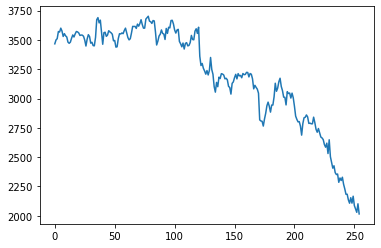


 El rendimiento medio es: 0.0022766495545119485

La desviación muestral es: 0.016888210290821618 

La desviación poblacional es: 0.016854932996831943


In [10]:
datos=investpy.get_stock_historical_data(stock="DIS",country="Mexico",from_date="24/05/2021", to_date="24/05/2022")

datos.to_csv("datos.csv")


datos=pd.read_csv("datos.csv",header=0,index_col="Date",parse_dates=True) #le peidmos leer los datos del csv 


ts=datos["Close"] #que tome los valores de precio de cierre de la acci+on 
print(ts)

lp=[] #creamos una lista vacia para los precios 

for i in range(len(ts)):
     lp.append(ts.iloc[i])
plt.plot(lp) #grafica de los precios
plt.show()

#calcular los rendimientos

lr=[] #lista de rendimientos
for i in range(1,len(lp)):
     lr.append((lp[i-1]/lp[i])-1) #para los rendimientos usamos la formula de el precio de cierre anterior entre el precio de cierre actual menos 1

print(f"\n El rendimiento medio es: {mean(lr)}")
print(f"\nLa desviación muestral es: {stdev(lr)} ")
print(f"\nLa desviación poblacional es: {pstdev(lr)}")




Y podemos visualizar el rendimiento

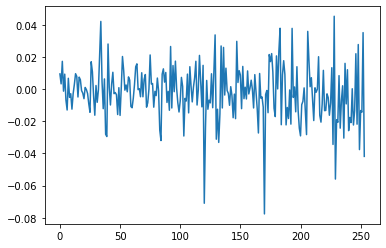

-0.0021334715982792313 0.016778914675829766


In [ ]:
lr=[]
for i in range(1,len(lp)):
    lr.append(log(lp[i]/lp[i-1]))
plt.plot(lr)
plt.show()
print(mean(lr), stdev(lr))

Y graficarlos juntos, mostrará las fluctuaciones en los mismos puntos

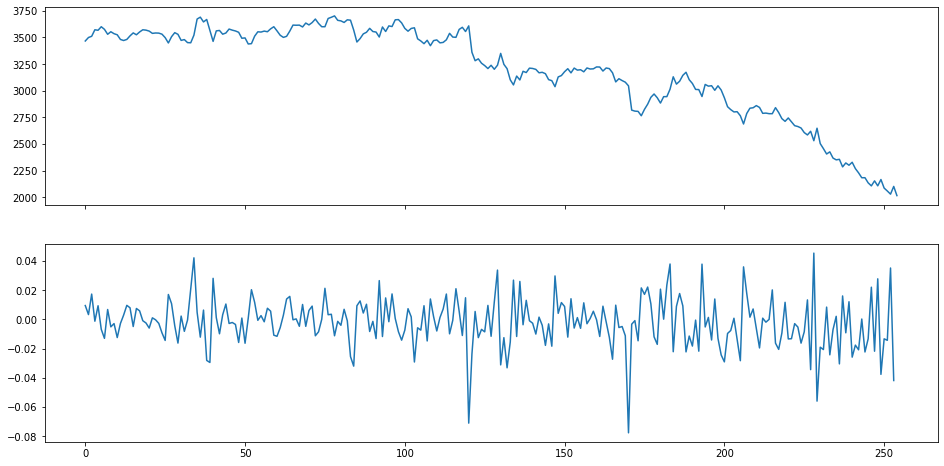

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)